In [1]:
# Pathing/system
from pathlib import Path

# Data structures
import pandas as pd


# Numerical
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = Path(r'C:\Users\matic\Documents\PersonalProjects\bechdel\data')
bechdel_clean_path = data_dir/'bechdel_clean.tsv.gz' # clean frozen data
imdb_dir = data_dir/'imdb'

In [3]:
bechdel = pd.read_csv(bechdel_clean_path, sep='\t', dtype={'imdbid':str})

In [4]:
bechdel

,year,imdbid,rating,title,id
0,1888,0392728,0,Roundhay Garden Scene,8040
1,1892,0000003,0,Pauvre Pierrot,5433
2,1895,0132134,0,"Execution of Mary, Queen of Scots, The",6200
3,1895,0000014,0,Tables Turned on the Gardener,5444
4,1896,0000131,0,Une nuit terrible,5406
...,...,...,...,...,...
8826,2021,5144174,3,"Dry, The",9498
8827,2021,10919362,3,Sweetheart,9505
8828,2021,10813940,2,Ginny and Georgia,9501
8829,2021,5109280,3,Raya and the Last Dragon,9504


#  asd

In [5]:
bechdel.describe()

,year,rating,id
count,8831.000000,8831.000000,8831.000000
mean,1996.604235,2.155702,4694.588722
std,23.470696,1.085418,2733.579056
min,1888.000000,0.000000,1.000000
25%,1989.000000,1.000000,2312.500000
50%,2006.000000,3.000000,4684.000000
75%,2013.000000,3.000000,7018.500000
max,2021.000000,3.000000,9506.000000


If you wanted one column, you could get the value counts this way

In [6]:
bechdel.rating.value_counts()

3    5102
1    1939
2     896
0     894
Name: rating, dtype: int64

It make smore sense to write it as a percentage though: 

Alternatively you can use it directly on the dataframe and specify the column. We also pass True to the normalize parameter to get a proportion instead of raw counts, and we multiply by 100 to make it a percentage:

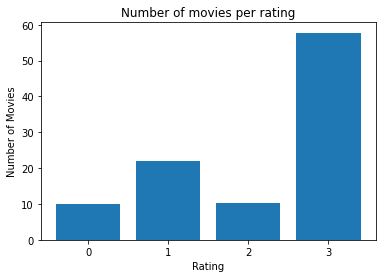

In [7]:
rating_perc = bechdel.value_counts(subset='rating', normalize=True)*100

fig, ax = plt.subplots()
ax.bar(rating_perc.index, rating_perc)
ax.set(xticks=rating_perc.index, xticklabels=rating_perc.index,
       xlabel='Rating', title='Number of movies per rating', ylabel='Number of Movies')
plt.show()

If you wanted to count unique combinations of different columns, you could also change the 'subset' parameter to a list of the columns you want.

In [9]:
bechdel.value_counts(subset=['year', 'rating'], sort=False)

year  rating
1888  0          1
1892  0          1
1895  0          2
1896  0          4
1897  0          1
                ..
2020  1         12
      2          4
      3         78
2021  2          2
      3          4
Length: 432, dtype: int64

In [10]:
bechdel.groupby(['year', 'rating'])['title'].nunique()

year  rating
1888  0          1
1892  0          1
1895  0          2
1896  0          4
1897  0          1
                ..
2020  1         12
      2          4
      3         78
2021  2          2
      3          4
Name: title, Length: 432, dtype: int64

We can't expect to haev the same amount of entries per year, so let's see use the value_counts to determine the number of entris per year:

In [11]:
year_counts = bechdel.year.value_counts().sort_index()
year_counts

1888      1
1892      1
1895      2
1896      4
1897      1
       ... 
2017    265
2018    231
2019    218
2020     98
2021      6
Name: year, Length: 128, dtype: int64

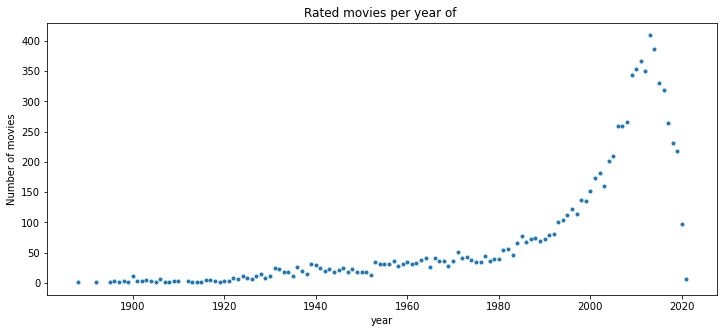

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(year_counts, '.')
ax.set(xlabel='year', ylabel='Number of movies', title='Rated movies per year of ')
plt.show()

We can get some summary statistics for every year with groupby:

In [13]:
aggs = ['mean', 'median', 'max', 'min']
agg_ratings = bechdel.groupby('year')['rating'].agg(aggs)
agg_ratings

,mean,median,max,min
year,,,,
1888,0.000000,0.0,0,0
1892,0.000000,0.0,0,0
1895,0.000000,0.0,0,0
1896,0.000000,0.0,0,0
1897,0.000000,0.0,0,0
...,...,...,...,...
2017,2.358491,3.0,3,0
2018,2.354978,3.0,3,0
2019,2.334862,3.0,3,0


That works as strings, because they are common enough someone took the time to make them available as strings. You could of course, pass any other function. For example, if you wanted to know the difference between the maximum and the minim rating per year using your own definition or a numpy function:

In [14]:
def my_agg_func(group):
    return(max(group) - min(group))

bechdel.groupby('year')['rating'].agg([my_agg_func, np.ptp])

,my_agg_func,ptp
year,,
1888,0,0
1892,0,0
1895,0,0
1896,0,0
1897,0,0
...,...,...
2017,3,3
2018,3,3
2019,3,3


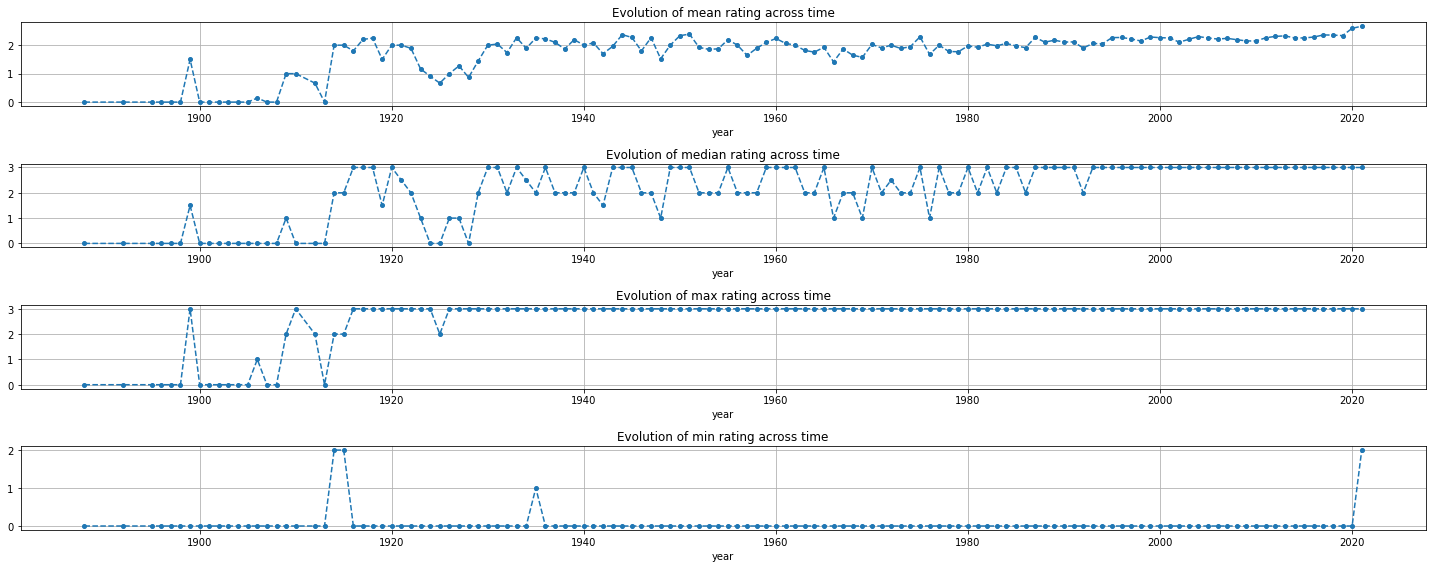

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(20, 4*2))
for agg, ax in zip(aggs, axes):
    agg_ratings[agg].plot(ax=ax, linestyle='--', marker='o', ms=4)
    ax.set(title=f'Evolution of {agg} rating across time')
    ax.grid(True)
plt.tight_layout()

We can ask the evolution of ratings as a function of time:

In [16]:
year_ratings = bechdel.pivot_table(index='rating', columns='year', values='title', aggfunc='nunique', fill_value=0)
year_ratings

year,1888,1892,1895,1896,1897,1898,1899,1900,1901,1902,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
rating,,,,,,,,,,,,,,,,,,,,,
0,1,1,2,4,1,3,1,11,3,4,...,22,33,25,27,22,17,16,15,4,0
1,0,0,0,0,0,0,0,0,0,0,...,72,70,82,68,65,49,39,41,12,0
2,0,0,0,0,0,0,0,0,0,0,...,32,36,49,30,32,21,23,18,4,2
3,0,0,0,0,0,0,1,0,0,0,...,224,270,230,206,200,178,153,144,78,4


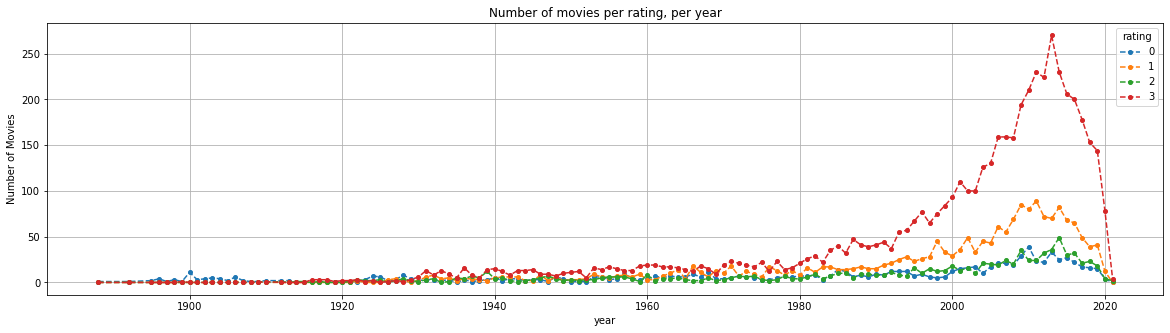

In [17]:
fig, ax = plt.subplots(figsize=(20, 5))
year_ratings.T.plot(ax=ax, linestyle='--', marker='o', ms=4)
ax.set(title='Number of movies per rating, per year', ylabel='Number of Movies')
ax.grid(True)
plt.show()

Notice also how i plotted directly from the dataframe.

In [18]:
year_ratings_p = year_ratings/year_ratings.sum()
year_ratings_p

year,1888,1892,1895,1896,1897,1898,1899,1900,1901,1902,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
rating,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,0.062857,0.080685,0.064767,0.081571,0.068966,0.064151,0.069264,0.068807,0.040816,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.205714,0.171149,0.212435,0.205438,0.203762,0.184906,0.168831,0.188073,0.122449,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.091429,0.088020,0.126943,0.090634,0.100313,0.079245,0.099567,0.082569,0.040816,0.333333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,...,0.640000,0.660147,0.595855,0.622356,0.626959,0.671698,0.662338,0.660550,0.795918,0.666667


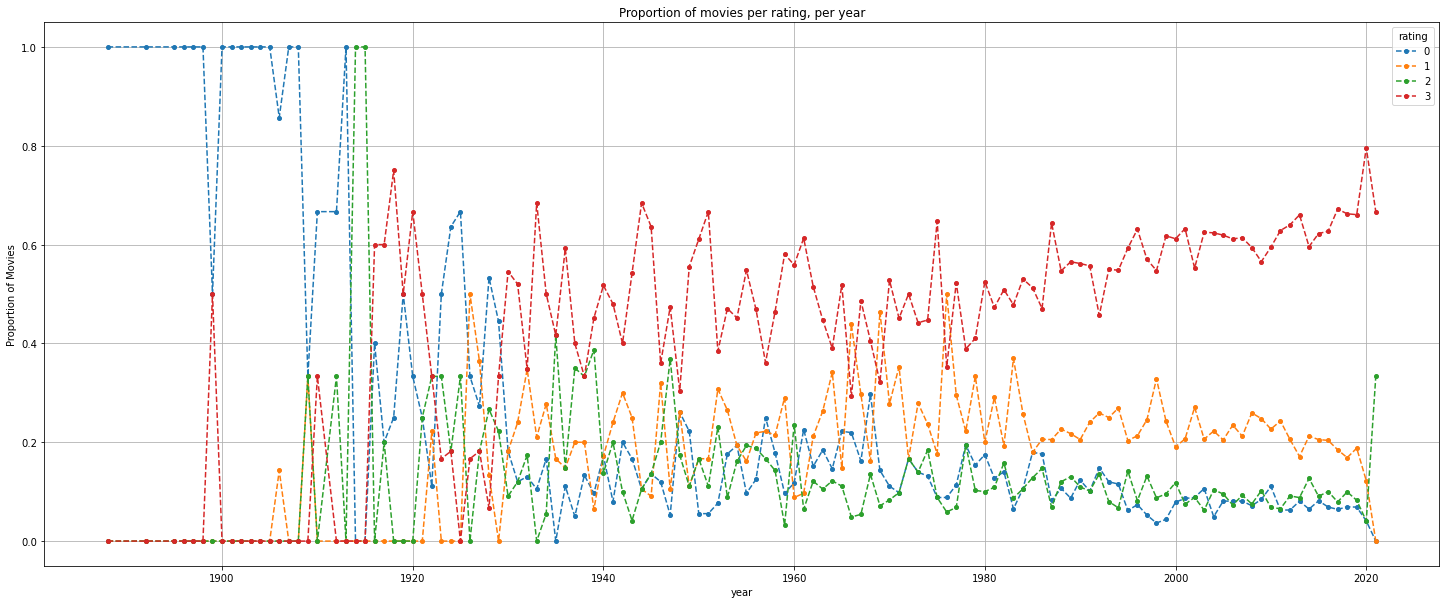

In [19]:
fig, ax = plt.subplots(figsize=(25, 10))
year_ratings_p.T.plot(ax=ax, linestyle='--', marker='o', ms=4)
ax.set(title='Proportion of movies per rating, per year', ylabel='Proportion of Movies')
ax.grid(True)
plt.show()

#  Mergin different datasets

In [20]:
imdb_ratings = pd.read_csv(imdb_dir/'IMDb ratings.csv')
imdb_movies = pd.read_csv(imdb_dir/'IMDb movies.csv')

C:\Users\matic\miniconda3\envs\bechdel\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
imdb_ratings.head(2)

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0


In [22]:
imdb_movies.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [23]:
imdb_movies.year.unique()

array([1894, 1906, 1911, 1912, 1919, 1913, 1914, 1915, 1916, 1917, 1918,
       1920, 1921, 1924, 1922, 1923, 1925, 1926, 1935, 1927, 1928, 1983,
       1929, 1930, 1932, 1931, 1937, 1938, 1933, 1934, 1936, 1940, 1939,
       1942, 1943, 1941, 1948, 1944, 2001, 1946, 1945, 1947, 1973, 1949,
       1950, 1952, 1951, 1962, 1953, 1954, 1955, 1961, 1956, 1958, 1957,
       1959, 1960, 1963, 1965, 1971, 1964, 1966, 1968, 1967, 1969, 1976,
       1970, 1979, 1972, 1981, 1978, 2000, 1989, 1975, 1974, 1986, 1990,
       2018, 1977, 1982, 1980, 1993, 1984, 1985, 1988, 1987, 2005, 1991,
       2002, 1994, 1992, 1995, 2017, 1997, 1996, 2006, 1999, 1998, 2007,
       2008, 2003, 2004, 2010, 2009, 2011, 2013, 2012, 2016, 2015, 2014,
       2019, 2020, '2012', '2015', '2009', '2013', '2018', '2014', '2017',
       '2011', '2016', '1981', '1975', '2010', '1984', '2007', '2006',
       '2001', '2004', '1979', '2019', '1967', '1978', '2003', '2005',
       '1969', '1990', '1983', '2002', '1996', '2008'

In [24]:
imdb_movies.loc[imdb_movies.year == 'TV Movie 2019', 'year'] = 2019
imdb_movies.year = imdb_movies.year.astype(int)

In [25]:
imdb_movies.sort_values(by='year', ascending=False).head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
84788,tt8845322,Todos os Mortos,Todos os Mortos,2020,2020,Drama,120,"Brazil, France",Portuguese,"Marco Dutra, Caetano Gotardo",...,"Mawusi Tulani, Clarissa Kiste, Carolina Bianch...",1899. The fates of the women in two families b...,5.6,116,NaN,NaN,NaN,48.0,NaN,13.0
54060,tt11060730,Maniyarayile Ashokan,Maniyarayile Ashokan,2020,2020-08-31,"Comedy, Romance",110,India,Malayalam,Shamzu Zayba,...,"Jacob Gregory, Anupama Parameshwaran, S.V. Kri...",When his unlucky horoscope doesn't bode well f...,4.6,518,NaN,NaN,NaN,NaN,34.0,5.0
52592,tt10230426,Mrs. Serial Killer,Mrs. Serial Killer,2020,2020-05-01,"Crime, Drama, Thriller",106,India,"Hindi, English",Shirish Kunder,...,"Jacqueline Fernandez, Manoj Bajpayee, Mohit Ra...",When a doctor gets jailed for a string of shoc...,4.9,10943,NaN,NaN,NaN,NaN,5261.0,19.0
54025,tt11051580,A Day & A Night,A Day & A Night,2020,2020-01-05,Drama,98,Egypt,Arabic,Ayman Makram,...,"Khaled Nabawy, Ahmad El-Fishawi, Dorra Zarrouk...",The film revolves around an officer who undert...,5.6,140,NaN,NaN,$ 36063,NaN,2.0,NaN
52591,tt10230422,Class of '83,Class of 83,2020,2020-08-21,"Action, Crime, Drama",98,India,Hindi,Atul Sabharwal,...,"Bobby Deol, Geetika Tyagi, Monika Panwar, Vish...",The story of an upright policeman-turned-train...,5.9,3658,NaN,NaN,NaN,NaN,194.0,22.0


We can look for a movie they have in common to detemrine the format of the imdbid to join

In [28]:
imdb_movies.title.isin(bechdel.title).sum()

3485

In [29]:
imdb_movies.loc[imdb_movies.title.isin(bechdel.title), ['imdb_title_id', 'title', 'year']]

,imdb_title_id,title,year
3,tt0002101,Cleopatra,1912
25,tt0003772,Cinderella,1914
28,tt0003973,A Florida Enchantment,1914
46,tt0004873,Alice in Wonderland,1915
71,tt0006745,Gretchen the Greenhorn,1916
...,...,...,...
85611,tt9620292,Promising Young Woman,2020
85668,tt9670282,Zoombies 2,2019
85675,tt9678892,Camille,2019
85696,tt9729206,Diner,2019


In [30]:
bechdel[bechdel.title == 'Zoombies 2']

,year,imdbid,rating,title,id
8673,2019,9670282,3,Zoombies 2,8796


So we see thta essentially we only need to add 'tt' to the index

In [31]:
bechdel.imdbid = 'tt' + bechdel.imdbid

In [32]:
merged = bechdel.merge(how='inner', right=imdb_movies, right_on='imdb_title_id', left_on='imdbid')
merged

,year_x,imdbid,rating,title_x,id,imdb_title_id,title_y,original_title,year_y,date_published,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,1906,tt0000574,1,"Story of the Kelly Gang, The",1349,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
1,1912,tt0002101,2,Cleopatra,2003,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
2,1914,tt0003973,2,A Florida Enchantment,4457,tt0003973,A Florida Enchantment,A Florida Enchantment,1914,1916-09-04,...,"Sidney Drew, Edith Storey, Charles Kent, Mrs. ...",A young woman discovers a seed that can make w...,5.8,202,NaN,NaN,NaN,NaN,6.0,3.0
3,1915,tt0004972,2,"Birth of a Nation, The",1258,tt0004972,Nascita di una nazione,The Birth of a Nation,1915,1915-03-21,...,"Henry B. Walthall, Lillian Gish, Mae Marsh, Mi...",The Stoneman family finds its friendship with ...,6.3,22213,$ 100000,NaN,NaN,NaN,368.0,97.0
4,1916,tt0007361,3,Snow White,7004,tt0007361,Snow White,Snow White,1916,1916-12-25,...,"Dorothy Cumming, Creighton Hale, Lionel Braham...","Snow White is a motherless princess, who arous...",6.2,349,NaN,NaN,NaN,NaN,13.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7875,2020,tt8244784,3,"Hunt, The",9179,tt8244784,The Hunt,The Hunt,2020,2020-03-24,...,"Betty Gilpin, Hilary Swank, Ike Barinholtz, Wa...",Twelve strangers wake up in a clearing. They d...,6.5,52794,$ 14000000,$ 5812500,$ 10530977,50.0,757.0,236.0
7876,2020,tt4682266,3,"New Mutants, The",9284,tt4682266,New Mutants,The New Mutants,2020,2020-09-02,...,"Maisie Williams, Anya Taylor-Joy, Charlie Heat...","Five young mutants, just discovering their abi...",5.6,4621,$ 67000000,$ 7487310,$ 10387310,41.0,173.0,54.0
7877,2020,tt1086064,3,Bill &amp; Ted Face the Music,9255,tt1086064,Bill & Ted Face the Music,Bill & Ted Face the Music,2020,2020-08-28,...,"Keanu Reeves, Alex Winter, Kristen Schaal, Sam...",Once told they'd save the universe during a ti...,6.4,9992,NaN,$ 1220452,$ 1231664,66.0,333.0,78.0
7878,2020,tt9086228,3,Gretel &amp; Hansel,9397,tt9086228,Gretel e Hansel,Gretel & Hansel,2020,2020-08-19,...,"Sophia Lillis, Samuel Leakey, Alice Krige, Jes...",A long time ago in a distant fairy tale countr...,5.3,18390,$ 5000000,$ 15347654,$ 21966625,64.0,418.0,154.0


See hoy many more movies we get from using the id than we would have if we used the titles

In [33]:
bechdel

,year,imdbid,rating,title,id
0,1888,tt0392728,0,Roundhay Garden Scene,8040
1,1892,tt0000003,0,Pauvre Pierrot,5433
2,1895,tt0132134,0,"Execution of Mary, Queen of Scots, The",6200
3,1895,tt0000014,0,Tables Turned on the Gardener,5444
4,1896,tt0000131,0,Une nuit terrible,5406
...,...,...,...,...,...
8826,2021,tt5144174,3,"Dry, The",9498
8827,2021,tt10919362,3,Sweetheart,9505
8828,2021,tt10813940,2,Ginny and Georgia,9501
8829,2021,tt5109280,3,Raya and the Last Dragon,9504


In [34]:
imdb_ratings

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,5.3,398,5.5,6.0,13,9,26,65,104,...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
85851,tt9911196,7.7,724,7.9,8.0,65,139,288,170,42,...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
85852,tt9911774,7.9,265,7.8,8.0,63,29,61,61,31,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0
85853,tt9914286,6.4,194,9.4,10.0,176,0,2,2,1,...,NaN,NaN,7.0,1.0,4.0,3.0,1.7,5.0,5.8,5.0
